### Polynomial Regression

*** 

### Introduction:

### Polynomial Regression is an extension of linear regression, allowing for a more flexible model that can capture non-linear relationships between the independent and dependent variables. While linear regression assumes a linear relationship between the variables, polynomial regression models this relationship as an nth degree polynomial.

### This technique is particularly useful when the relationship between the variables does not follow a straight line but rather curves or bends. Polynomial regression introduces polynomial terms (e.g., squared or cubed terms) to the regression equation, enabling the model to better fit complex datasets and capture intricate patterns that linear models might miss.

### In this section, we will work with a dataset which contains information about the length and width of fields. Using these features, we will build a Multiple Linear Regression model and a Polynomial Regression model. Then, we will compare the accuracy of  these models using K-Fold Cross Validation and the R² score.

***

### Importing libraries and data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing data
df = pd.read_csv('fields.csv')
df.head()

,length,profit,width
0,807.0,634630.0,1032.0
1,299.0,124074.0,337.0
2,431.0,1338300.0,1631.0
3,744.0,327720.0,553.0
4,364.0,500244.0,827.0


### Visualizing the lenght and profit of fields

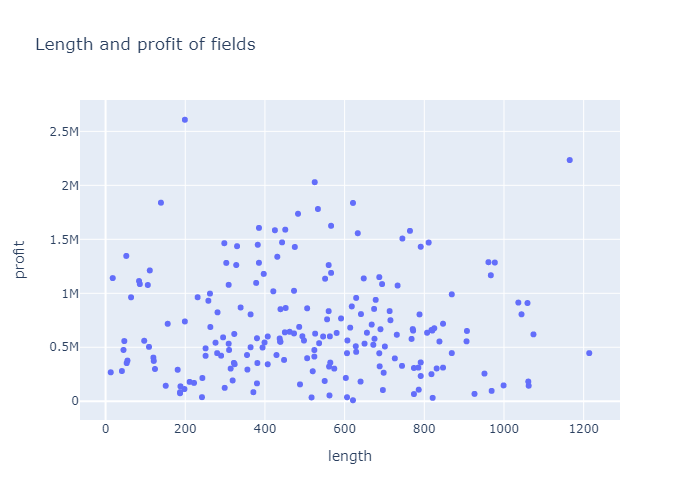

In [3]:
fig = px.scatter(df, x="length", y="profit", title="Length and profit of fields")
fig.show("png")

### Visualizing the width and profit of fields

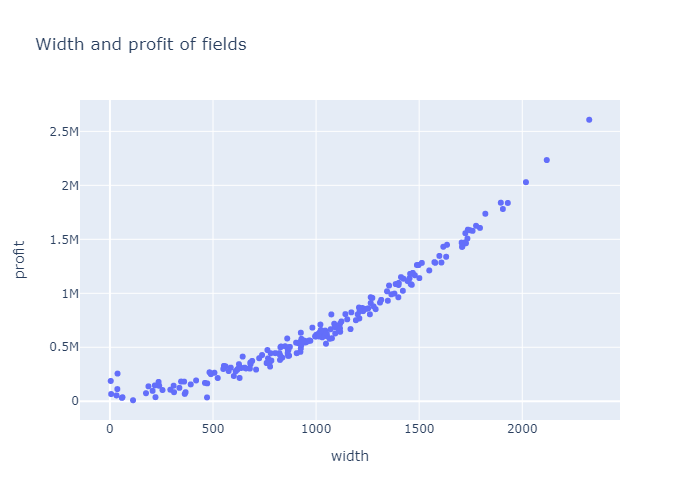

In [4]:
fig = px.scatter(df, x="width", y="profit", title="Width and profit of fields")
fig.show("png")

### Model 1: Multiple Linear Regression

In [5]:
# Define features and target variable
X = df[['length', 'width']].values
y = df[['profit']].values

# Instantiate KFold with 3 splits
kf = KFold(n_splits=3, shuffle=True)

# Initialize a list to store R² scores
r2_scores = []

for train_index, test_index in kf.split(X):
    # Splitting the data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Instantiate model
    model = LinearRegression()

    # Train model
    model.fit(X_train, y_train)

    # Generating predictions
    y_pred = model.predict(X_test)

    # Calculating and storing the R² score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Outputting the average R² score
average_r2 = np.mean(r2_scores)
print('Average R² score with 3-Fold Cross Validation:', average_r2)

# Outputting the individual R² scores
print('Individual R² scores:', r2_scores)

Average R² score with 3-Fold Cross Validation: 0.9173288550278101
Individual R² scores: [0.9368878298607177, 0.908522159117365, 0.9065765761053475]


### Model 2: Polynomial Regression

In [6]:
# Define features and target variable
X = df[['length', 'width']].values
y = df[['profit']].values

# Instantiate KFold with 3 splits
kf = KFold(n_splits=3, shuffle=True)

# Instantiate polynomial features
pf = PolynomialFeatures(degree=2, include_bias=False)

# Initialize a list to store R² scores
r2_scores = []

for train_index, test_index in kf.split(X):
    # Splitting the data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Transforming X_train and X_test for the Polynomial Regression
    X_train_poly = pf.fit_transform(X_train)
    X_test_poly = pf.transform(X_test)

    # Instantiate model
    model = LinearRegression()

    # Train model
    model.fit(X_train_poly, y_train)

    # Generating predictions
    y_pred = model.predict(X_test_poly)

    # Calculating and storing the R² score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Outputting the average R² score
average_r2 = np.mean(r2_scores)
print('Average R² score with 3-Fold Cross Validation:', average_r2)

# Outputting the individual R² scores
print('Individual R² scores:', r2_scores)

Average R² score with 3-Fold Cross Validation: 0.98776843598279
Individual R² scores: [0.9876179703073091, 0.9875601644748958, 0.9881271731661648]


*** 

### Conclusion:

### In this project, we explored the application of Polynomial Regression to predict profit based on the dimensions (length and width) of fields. Initially, a Multiple Linear Regression model was trained using the original features. The model achieved an average R² score of 0.91, indicating its ability to explain the variance in profit based on linear relationships between the variables. 

### Subsequently, Polynomial Regression was implemented by transforming the original features into polynomial features of degree 2. This transformation allowed the model to capture non-linear relationships that might exist between the predictors and the target variable. The Polynomial Regression model achieved an improved R² score of 0.98, demonstrating its capability to better fit the data compared to Multiple Linear Regression. 

### This enhancement underscores the effectiveness of Polynomial Regression in capturing complex patterns and improving predictive accuracy when dealing with non-linear relationships in data.